<a href="https://colab.research.google.com/github/RLSwanepoel/Hackathons/blob/master/Classification_Hackathon_1074.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Honour Code

I Riaan Swanepoel, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

# Xente Fraud Detection Challenge
This is my notebook for the EDSA classification hackathon on the Zindi [Xente Fraud Detection Challenge](http://zindi.africa/competitions/xente-fraud-detection-challenge). In this challenge, I attempt to create a machine learning model that will predict fraudulent transactions for Xente.

In [0]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [0]:
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('test.csv')

## Data exploration
I will first begin by exploring and understanding the data available. I will look at the data types, identify any missing values, etc.

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


In [0]:
df_train.isna().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

Many of the features are of object type and will have to be processed in order to make it usable for the model. I also looked at missing values and saw that there is none and we therefore do not have to fill any missing values in.

In [0]:
print(df_train.shape)
df_train.head()

(95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [0]:
#Investigating the fraudulent transactions
df_train[df_train.FraudResult == 1].head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
131,TransactionId_60873,BatchId_93685,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15T08:04:51Z,0,1
146,TransactionId_28016,BatchId_125553,AccountId_2366,SubscriptionId_4834,CustomerId_7414,UGX,256,ProviderId_5,ProductId_9,financial_services,ChannelId_1,725000.0,725000,2018-11-15T08:20:09Z,2,1
155,TransactionId_1149,BatchId_10381,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-15T08:31:57Z,0,1
2376,TransactionId_136904,BatchId_52644,AccountId_3692,SubscriptionId_3451,CustomerId_4134,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17T09:15:23Z,0,1
2452,TransactionId_88818,BatchId_54481,AccountId_3832,SubscriptionId_4161,CustomerId_4275,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,700000.0,700000,2018-11-17T11:49:46Z,0,1
3778,TransactionId_65985,BatchId_34263,AccountId_2366,SubscriptionId_4834,CustomerId_7414,UGX,256,ProviderId_5,ProductId_9,financial_services,ChannelId_1,905000.0,905000,2018-11-19T12:10:31Z,2,1
4500,TransactionId_4222,BatchId_127498,AccountId_1959,SubscriptionId_1476,CustomerId_2353,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,800000.0,800000,2018-11-20T12:00:29Z,0,1
4508,TransactionId_2550,BatchId_79762,AccountId_4003,SubscriptionId_3002,CustomerId_4453,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,770000.0,770000,2018-11-20T12:27:15Z,0,1
4755,TransactionId_49480,BatchId_77828,AccountId_3943,SubscriptionId_1417,CustomerId_4391,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,500000.0,500000,2018-11-20T22:11:53Z,0,1
4911,TransactionId_66468,BatchId_89498,AccountId_4590,SubscriptionId_666,CustomerId_5054,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,500000.0,500000,2018-11-21T08:26:49Z,4,1


Before we start with data cleaning and modeling, I will look at the predictor variable. FraudResult is a binary variable with 0 meaning that the transaction is not fraudulent and 1 meaning that the transaction is fraudulent. 

In [0]:
print(df_train['FraudResult'].sum()/len(df_train)*100)

0.20175200183981098


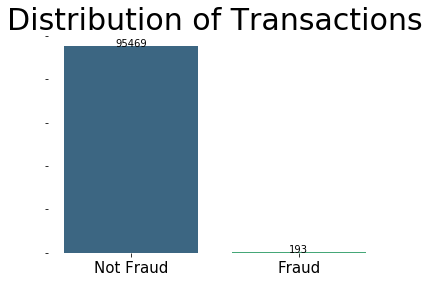

In [0]:
#from https://www.kaggle.com/tboyle10/methods-for-dealing-with-imbalanced-data
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(df_train.FraudResult, palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Transactions', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

Based on this basic assessment, I can see that the predictor is quite unbalanced and biased toward not fraudulent. Therefore I need to somehow deal with this unbalanced data. However, I will first do data cleaning and data engineering before I deal with the unbalanced data.

I will first combine the train and test datasets in order to simultaneously clean and engineer both datasets exactly the same. I created a len_train variable to keep track of the datasets in the combined set.

In [0]:
len_train = len(df_train)
df_all = pd.concat([df_train, df_test], sort=False)

Since this dataset is from Xente in Uganda, I will just confirm that there is only one currency and country code within the dataset.

In [0]:
print(df_all['CurrencyCode'].unique())
print(df_all['CountryCode'].unique())

['UGX']
[256]


In [0]:
print(len(df_all['TransactionId'].unique()))
print(df_all.shape)

140681
(140681, 16)


Since there is only one country and currency within the datasets, I decided to drop these columns as these can't be used to predict the fraudulent cases.

In [0]:
#There is only one country and currency so this is useless for the model and will be dropped
df_all = df_all.drop(['TransactionId','CurrencyCode','CountryCode'], axis = 1)

Next, I decided to split the TransactionStartTime into year, month, day, hour, minute and second features. 

In [0]:
df_all['Date'] = df_all['TransactionStartTime'].str.split('T',expand=True)[0]
df_all['Time'] = df_all['TransactionStartTime'].str.split('T',expand=True)[1]
df_all['Time'] = df_all['Time'].map(lambda x: x.strip('Z'))

In [0]:
df_all['Year'] = df_all['Date'].str.split('-',expand=True)[0].astype(int)
df_all['Month'] = df_all['Date'].str.split('-',expand=True)[1].astype(int)
df_all['Day'] = df_all['Date'].str.split('-',expand=True)[2].astype(int)

In [0]:
df_all['Hour'] = df_all['Time'].str.split(':',expand=True)[0].astype(int)
df_all['Minute'] = df_all['Time'].str.split(':',expand=True)[1].astype(int)
df_all['Second'] = df_all['Time'].str.split(':',expand=True)[2].astype(int)

In [0]:
df_all = df_all.drop(['TransactionStartTime','Date','Time'], axis=1)

In [0]:
df_all.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Hour,Minute,Second
0,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0.0,2018,11,15,2,18,49
1,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0.0,2018,11,15,2,19,8
2,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0.0,2018,11,15,2,44,21
3,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0.0,2018,11,15,3,32,55
4,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0.0,2018,11,15,3,34,21


All of the Id features can be encoded as numbers. I therefore removed the leading text and only kept the integer part for the Id's.

In [0]:
#df_all['TransactionId'] = df_all['TransactionId'].map(lambda x: x.strip('TransactionId_'))#.astype(int)
df_all['BatchId'] = df_all['BatchId'].map(lambda x: x.strip('BatchId_')).astype(int)
df_all['AccountId'] = df_all['AccountId'].map(lambda x: x.strip('AccountId_')).astype(int)
df_all['SubscriptionId'] = df_all['SubscriptionId'].map(lambda x: x.strip('SubscriptionId_')).astype(int)
df_all['CustomerId'] = df_all['CustomerId'].map(lambda x: x.strip('CustomerId_')).astype(int)
df_all['ProviderId'] = df_all['ProviderId'].map(lambda x: x.strip('ProviderId_')).astype(int)
df_all['ProductId'] = df_all['ProductId'].map(lambda x: x.strip('ProductId_')).astype(int)
df_all['ChannelId'] = df_all['ChannelId'].map(lambda x: x.strip('ChannelId_')).astype(int)

In [0]:
#Confirming that the Id's are stripped of the leading strings
df_all.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Year,Month,Day,Hour,Minute,Second
0,36123,3957,887,4406,6,10,airtime,3,1000.0,1000,2,0.0,2018,11,15,2,18,49
1,15642,4841,3829,4406,4,6,financial_services,2,-20.0,20,2,0.0,2018,11,15,2,19,8
2,53941,4229,222,4683,6,1,airtime,3,500.0,500,2,0.0,2018,11,15,2,44,21
3,102363,648,2185,988,1,21,utility_bill,3,20000.0,21800,2,0.0,2018,11,15,3,32,55
4,38780,4841,3829,988,4,6,financial_services,2,-644.0,644,2,0.0,2018,11,15,3,34,21


Lastly the ProductCategory needs to be encoded in order to make it usable for the machine learning algorithm.

In [0]:
df_all = pd.get_dummies(df_all,drop_first=True)

In [0]:
#Checking the datatypes for the features to confirm that all features are numerical values
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140681 entries, 0 to 45018
Data columns (total 26 columns):
BatchId                               140681 non-null int64
AccountId                             140681 non-null int64
SubscriptionId                        140681 non-null int64
CustomerId                            140681 non-null int64
ProviderId                            140681 non-null int64
ProductId                             140681 non-null int64
ChannelId                             140681 non-null int64
Amount                                140681 non-null float64
Value                                 140681 non-null int64
PricingStrategy                       140681 non-null int64
FraudResult                           95662 non-null float64
Year                                  140681 non-null int64
Month                                 140681 non-null int64
Day                                   140681 non-null int64
Hour                                  140681 no

Now that the data has been cleaned and engineered, I split the dataset back into the training and testing set.

In [0]:
train = df_all[:len_train]
test = df_all[len_train:].drop('FraudResult',axis=1)

In [0]:
#Setting variables for the predictor and the features
y = train['FraudResult']
X = train.drop('FraudResult',axis=1)

We will try four different models and assess their performance using accuracy, f1 score, recall and auc metrics.

In [0]:
lr = LogisticRegression(solver = 'saga',max_iter=100,n_jobs=-1)
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
adb = AdaBoostClassifier()
knn = KNeighborsClassifier(n_jobs=-1)

In [0]:
print('Logistic Regression\n')
accuracy = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
f1 = cross_val_score(lr, X, y, cv=5, scoring='f1')
recall = cross_val_score(lr, X, y, cv=5, scoring='recall')
auc = cross_val_score(lr, X, y, cv=5, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("F1: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("AUC: %0.2f (+/- %0.2f)" % (auc.mean(), auc.std() * 2))

print('\nRandom forest\n')
accuracy = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
f1 = cross_val_score(rf, X, y, cv=5, scoring='f1')
recall = cross_val_score(rf, X, y, cv=5, scoring='recall')
auc = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("F1: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("AUC: %0.2f (+/- %0.2f)" % (auc.mean(), auc.std() * 2))

print('\nAdaBoost\n')
accuracy = cross_val_score(adb, X, y, cv=5, scoring='accuracy')
f1 = cross_val_score(adb, X, y, cv=5, scoring='f1')
recall = cross_val_score(adb, X, y, cv=5, scoring='recall')
auc = cross_val_score(adb, X, y, cv=5, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("F1: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("AUC: %0.2f (+/- %0.2f)" % (auc.mean(), auc.std() * 2))

print('\nKNN\n')
accuracy = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
f1 = cross_val_score(knn, X, y, cv=5, scoring='f1')
recall = cross_val_score(knn, X, y, cv=5, scoring='recall')
auc = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))
print("F1: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("AUC: %0.2f (+/- %0.2f)" % (auc.mean(), auc.std() * 2))

Logistic Regression

Accuracy: 1.00 (+/- 0.00)
F1: 0.38 (+/- 0.21)
Recall: 0.37 (+/- 0.28)
AUC: 0.78 (+/- 0.16)

Random forest

Accuracy: 1.00 (+/- 0.00)
F1: 0.80 (+/- 0.24)
Recall: 0.77 (+/- 0.40)
AUC: 0.99 (+/- 0.02)

AdaBoost

Accuracy: 1.00 (+/- 0.00)
F1: 0.79 (+/- 0.31)
Recall: 0.77 (+/- 0.35)
AUC: 0.99 (+/- 0.02)

SVC



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


It seems KNN gives me the best score using cross validation.
Next, I use Gridsearch to find the best parameters for KNN.

In [0]:
knn_params = {'n_neighbors' : [1,2,3,4,5],
              'weights' : ('uniform','distance'),
              'leaf_size' : [10,20,30,40,50]}
clf = GridSearchCV(knn, knn_params, cv=5, scoring='f1')

In [0]:
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=4, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [0]:
clf.best_params_

{'leaf_size': 10, 'n_neighbors': 4, 'weights': 'uniform'}

In [0]:
#Fitting model with best parameters
knn = KNeighborsClassifier(leaf_size=10, n_neighbors=4, weights='uniform', n_jobs=-1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
#Creating dataframe with predictions
submission = pd.DataFrame({'TransactionId': df_test.TransactionId.values, 'FraudResult': knn.predict(test).astype(int)})

In [0]:
submission.head()

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0


In [0]:
#Saving file for submission
submission.to_csv('submission.csv', index=False)

In [0]:
#This code is specific to google colab in order to make submission file available for download
from google.colab import files
files.download('submission.csv')